In [25]:
# For system stuff
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [26]:
# Load the data
import pandas as pd
df = pd.read_csv('data.csv')
df.head()

,Ones,Twos,Threes,Fours,Fives,Sixes,Weighted?
0,0.128000,0.200000,0.128000,0.176000,0.192000,0.176000,False
1,0.220588,0.191176,0.191176,0.132353,0.176471,0.088235,False
2,0.173913,0.104348,0.113043,0.173913,0.278261,0.156522,True
3,0.136986,0.178082,0.136986,0.164384,0.191781,0.191781,False
4,0.123656,0.150538,0.139785,0.112903,0.166667,0.306452,True


In [27]:
# Using sklearn to split the data into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = df[['Ones', 'Twos', 'Threes', 'Fours', 'Fives', 'Sixes']]
y = df['Weighted?']
encoder = LabelEncoder()
y = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall

# Neural network model
model = Sequential()
model.add(Dense(128, input_shape=(6,), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
adam = Adam(learning_rate=0.01)

model.compile(
    loss='binary_crossentropy',
    optimizer=adam,
    metrics=['accuracy', Precision(), Recall()]
)
model.build(X.shape)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 128)               896       
                                                                 
 dropout_12 (Dropout)        (None, 128)               0         
                                                                 
 dense_16 (Dense)            (None, 256)               33024     
                                                                 
 dropout_13 (Dropout)        (None, 256)               0         
                                                                 
 dense_17 (Dense)            (None, 256)               65792     
                                                                 
 dropout_14 (Dropout)        (None, 256)               0         
                                                                 
 dense_18 (Dense)            (None, 64)               

In [29]:
from tensorflow.keras.callbacks import ModelCheckpoint

mc = ModelCheckpoint("nnModel.h5", monitor="val_loss", verbos=1, save_best_only=True, mode="min") # Saves the model

history = model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=10000,
    validation_split=0.2,
    callbacks=[mc]
)

Epoch 1/100
6/6 [==============================] - 4s 419ms/step - loss: 0.6939 - accuracy: 0.5640 - precision_3: 0.5615 - recall_3: 0.5188 - val_loss: 0.5441 - val_accuracy: 0.8456 - val_precision_3: 0.9867 - val_recall_3: 0.7043
Epoch 2/100
6/6 [==============================] - 2s 270ms/step - loss: 0.5482 - accuracy: 0.7731 - precision_3: 0.7121 - recall_3: 0.9045 - val_loss: 0.3961 - val_accuracy: 0.8825 - val_precision_3: 0.8207 - val_recall_3: 0.9825
Epoch 3/100
6/6 [==============================] - 2s 312ms/step - loss: 0.3794 - accuracy: 0.8968 - precision_3: 0.8878 - recall_3: 0.9046 - val_loss: 0.2786 - val_accuracy: 0.9084 - val_precision_3: 0.9840 - val_recall_3: 0.8324
Epoch 4/100
6/6 [==============================] - 2s 263ms/step - loss: 0.2795 - accuracy: 0.9100 - precision_3: 0.9527 - recall_3: 0.8598 - val_loss: 0.1872 - val_accuracy: 0.9320 - val_precision_3: 0.9708 - val_recall_3: 0.8924
Epoch 5/100
6/6 [==============================] - 2s 274ms/step - loss: 0.2

In [30]:
# Get metrics of the final model
loss, accuracy, precision, recall = model.evaluate(X_test, y_test)
print("Accuracy: %f" % accuracy)
print("Loss: %f" % loss)
print("Precision: %f" % precision)
print("Recall: %f" % recall)

938/938 [==============================] - 4s 4ms/step - loss: 0.1438 - accuracy: 0.9519 - precision_3: 0.9768 - recall_3: 0.9254
Accuracy: 0.951867
Loss: 0.143755
Precision: 0.976751
Recall: 0.925353


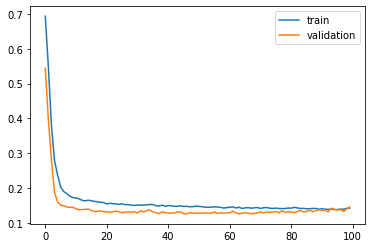

In [31]:
# Plot the loss
import matplotlib.pyplot as plt

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["train", "validation"])
plt.show()

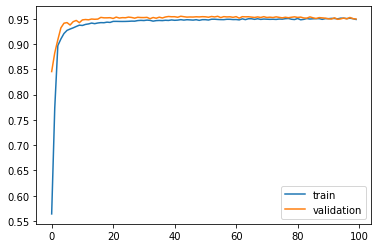

In [32]:
# Plot the accuracy
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.legend(["train", "validation"])
plt.show()